# Natural language processing for Steam videogames reviews

In [1]:
# Importing data
from google.colab import files
uploaded = files.upload()

Saving output.csv to output.csv


In [2]:
import pandas as pd

dataset = pd.read_csv('output.csv')
dataset.head(10)

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative
5,176118004,100,Every enemy and their grandmother have aimbot ...,76561198296823531,Negative
6,172896379,100,l,76561199182060159,Negative
7,171821329,100,Counter Strike: Condition Zero Deleted Scenes(...,76561199032983213,Negative
8,171639855,100,[REVIEW IS FOR DELETED SCENES] Game is pretty ...,76561198866570651,Negative
9,167078851,100,too many enemies,76561199554114911,Negative


In [44]:
dataset.shape

(201151, 5)

In [45]:
# Counting null values
dataset['content'].isnull().sum()

428

In [46]:
dataset_copy = dataset.copy()

# Dropping rows with null values in the 'content' column
dataset_copy = dataset_copy.dropna(subset=['content'])

dataset_copy.shape

(200723, 5)

In [47]:
# Counting positives and negatives reviews
dataset_copy['is_positive'].value_counts(normalize=True)*100

,proportion
is_positive,
Positive,51.00412
Negative,48.99588


Dataset is balanced

In [48]:
# Dropping unnecessary columns
dataset_copy = dataset_copy.drop(columns=['id', 'app_id', 'author_id'])
dataset_copy.shape

(200723, 2)

In [49]:
dataset_copy.head()

,content,is_positive
0,At least its a counter strike -1/100,Negative
1,Uh... So far my playthrough has not been great...,Negative
2,Better mechanics than cs2,Negative
3,buggy mess and NOT fun to play at all,Negative
4,"Whoever came up with this, is gonna fucking ge...",Negative


In [50]:
# Modifying is_positive text label to numeric label
dataset_copy['is_positive'] = dataset_copy['is_positive'].map({'Positive': 1, 'Negative': 0})
dataset_copy.head()

,content,is_positive
0,At least its a counter strike -1/100,0
1,Uh... So far my playthrough has not been great...,0
2,Better mechanics than cs2,0
3,buggy mess and NOT fun to play at all,0
4,"Whoever came up with this, is gonna fucking ge...",0


In [52]:
# Positive review sample
dataset_copy[dataset_copy['is_positive']==1].sample(n=1)['content'].iloc[0]

'better than hunt down the freeman 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍🍆'

In [53]:
# Negative review sample
dataset_copy[dataset_copy['is_positive']==0].sample(n=1)['content'].iloc[0]

'Your worst enemy is literally your own teammates.'

In [54]:
# Word counting on each review
word_counts = dataset_copy['content'].apply(lambda x: len(x.split()))
word_counts.describe()

,content
count,200723.000000
mean,25.283874
std,66.698997
min,0.000000
25%,3.000000
50%,8.000000
75%,21.000000
max,3994.000000


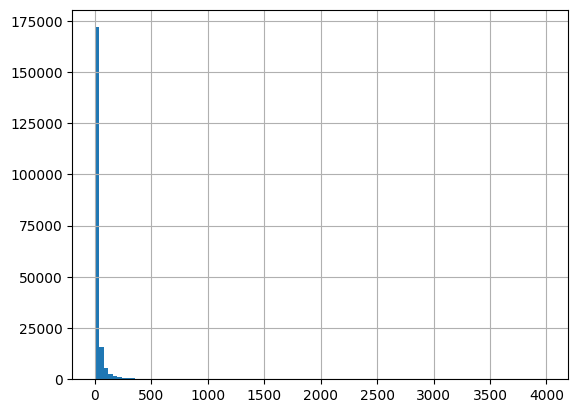

In [55]:
import matplotlib.pyplot as plt
plt.hist(word_counts.values, bins=100)
plt.grid(True)
plt.show()

Most reviews have between 0 and 250 words.

In [76]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [57]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=6376022c99bd31eebdeb2e7a9560da5eb612f592b5b2787fbbc99a0ee95a4d3f
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [58]:
from langdetect import detect
import pandas as pd

# Language detecting function
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# Applying function to each review on the dataframe
dataset_copy['language'] = dataset_copy['content'].apply(lambda content: detect_language(content))

dataset_copy.head()


,content,is_positive,language
0,At least its a counter strike -1/100,0,en
1,Uh... So far my playthrough has not been great...,0,en
2,Better mechanics than cs2,0,en
3,buggy mess and NOT fun to play at all,0,en
4,"Whoever came up with this, is gonna fucking ge...",0,en


In [59]:
# Number of reviews per language
language_counts = dataset_copy['language'].value_counts()
print(language_counts)

language
en         142498
so           6160
unknown      4425
de           3920
tl           3060
ca           2848
af           2555
da           2476
cy           2404
no           2291
es           2214
ru           2196
sq           1837
pt           1796
tr           1781
nl           1677
it           1617
fr           1436
pl           1436
id           1410
ro           1307
et           1121
sl            898
sv            842
hr            836
vi            832
sw            786
fi            783
hu            586
sk            486
uk            312
bg            298
lt            292
cs            281
lv            263
mk            212
ko            123
th             97
zh-cn          97
ar             71
ja             64
fa             38
he             27
el             18
ur              9
zh-tw           2
kn              1
bn              1
hi              1
ne              1
mr              1
Name: count, dtype: int64


In [60]:
# Dropping rows where the 'language' column is not 'en'
dataset_copy = dataset_copy[dataset_copy['language'] == 'en']

In [62]:
# Verifying that the new dataset is still balanced
dataset_copy['is_positive'].value_counts(normalize = True)

,proportion
is_positive,
0,0.511228
1,0.488772


In [65]:
# English stop words
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
lemmatizer = WordNetLemmatizer()

In [72]:
def data_preprocessing(content):

  # Data cleaning
  content = re.sub(re.compile('<.*?>'), '', content) #removing html tags
  content =  re.sub('[^A-Za-z0-9]+', ' ', content) #taking only words

  # All to lowercase
  content = content.lower()

  # Tokenization
  tokens = nltk.word_tokenize(content)

  # Removing stop_words
  content = [word for word in tokens if word not in stop_words]

  # Lemmatization
  content = [lemmatizer.lemmatize(word) for word in content]

  # Joining processed words
  content = ' '.join(content)

  return content

In [78]:
#  seg
dataset_copy['preprocessed_review'] = dataset_copy['content'].apply(lambda content: data_preprocessing(content))
dataset_copy.head()

,content,is_positive,language,preprocessed_review
0,At least its a counter strike -1/100,0,en,least counter strike 1 100
1,Uh... So far my playthrough has not been great...,0,en,uh far playthrough great glitched texture cont...
2,Better mechanics than cs2,0,en,better mechanic cs2
3,buggy mess and NOT fun to play at all,0,en,buggy mess fun play
4,"Whoever came up with this, is gonna fucking ge...",0,en,whoever came gon na fucking get negative revie...


In [96]:
# Data splitting for training and testing
from sklearn.model_selection import train_test_split

data = dataset_copy.copy()
y = data['is_positive'].values
data.drop(['is_positive','language'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)


Train data: (99748, 2) (99748,)
Test data: (42750, 2) (42750,)


## Text vectorizing

### BoW (Bag of words)

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=5000)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review']).toarray()
X_test_review_bow = vect.transform(X_test['preprocessed_review']).toarray()

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (99748, 5000)
X_test_review_bow shape:  (42750, 5000)


In [98]:
X_train_review_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [100]:
data['content'].iloc[1]

'Uh... So far my playthrough has not been great. Glitched textures, A content block I never enabled, Game crashing as soon as I use the fiber optic camera, Just a ton of problems. UPDATE: Hit the F key on Miami heat...Game crashed.'

In [101]:
df_bow = pd.DataFrame(X_train_review_bow, columns =vect.get_feature_names_out() )
df_bow.head()

,00,000,10,100,1000,10000,10k,10x,11,111,...,youtube,youve,yr,zen,zero,zoey,zombie,zombine,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train_review_bow[0]

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
X_train['preprocessed_review'].iloc[0]

'please leave late'

In [106]:
df_bow[['game','crash','fps','action','relax','shooter','rpg','best']]

,game,crash,fps,action,relax,shooter,rpg,best
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
99743,0,0,0,0,0,0,0,0
99744,1,0,0,0,0,0,0,0
99745,0,0,0,0,0,0,0,0
99746,0,0,0,0,0,0,0,0


In [111]:
# Creating a multinomial classifier (default parameters)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def test_representations(X, y, X_test, y_test):
    classifier = MultinomialNB().fit(X, y)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy * 100)

    # Showing confusion matrix in Test data
    cm = confusion_matrix(y_test, y_pred)
    print_confusion_matrix(cm, accuracy)

def print_confusion_matrix(confusion_matrix, accuracy):
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix. Accur={}'.format(accuracy))
    plt.show()


82.59181286549708


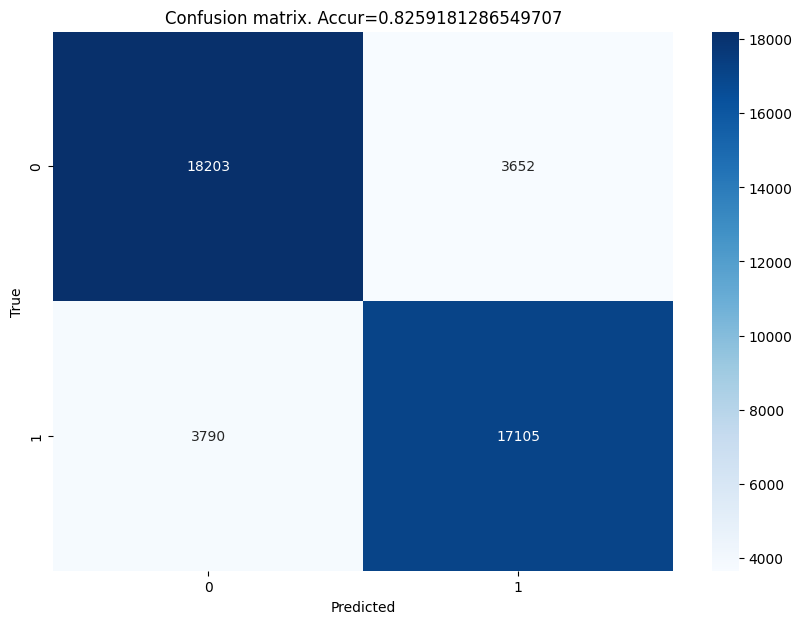

In [112]:
test_representations(X_train_review_bow, y_train, X_test_review_bow, y_test)

First model with Multinomial classifier and BoW vectorizing results in an Accuracy of 82.6%

### TFIDF

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review']).toarray()
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review']).toarray()

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (99748, 5000)
X_test_review_tfidf shape:  (42750, 5000)


In [114]:
df_tf = pd.DataFrame(X_train_review_tfidf, columns=vectorizer.get_feature_names_out())

In [115]:
df_tf

,00,000,10,100,1000,10000,10k,10x,11,111,...,youtube,youve,yr,zen,zero,zoey,zombie,zombine,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df_tf[['game','crash','fps','action','relax','shooter','rpg','best']]

,game,crash,fps,action,relax,shooter,rpg,best
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.228715,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.069243,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99743,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99744,0.102528,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99745,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99746,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


83.33333333333334


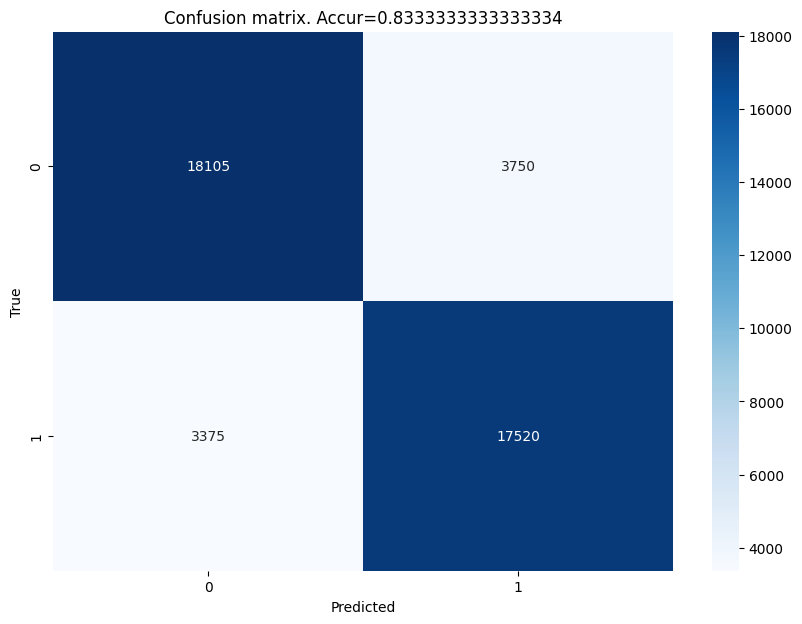

In [117]:
test_representations(X_train_review_tfidf, y_train, X_test_review_tfidf, y_test)

Second model with Multinomial classifier and TFIDF vectorizing results in an Accuracy of 83.3%

### Word embeddings

In [118]:
from gensim.models import Word2Vec
import numpy as np

In [119]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [120]:
import spacy
nlp = spacy.load("en_core_web_md")

In [122]:
# Using 25% of the data due to computational power restrictions
X_train_r = X_train.reset_index(drop=True)
X_test_r = X_test.reset_index(drop=True)

In [123]:
X_train_r.shape, X_test_r.shape

((99748, 2), (42750, 2))

In [124]:
X_train_s = X_train_r.sample(frac=0.25, random_state=42)
X_test_s = X_test_r.sample(frac=0.25, random_state=42)

In [125]:
X_train_s.shape, X_test_s.shape

((24937, 2), (10688, 2))

In [127]:
#Tarda 6 min aprox
X_train_w2v = np.stack([nlp(text).vector for text in X_train_s['preprocessed_review'].values])
X_test_w2v = np.stack([nlp(text).vector for text in X_test_s['preprocessed_review'].values])

In [128]:
X_train_w2v.shape, X_test_w2v.shape

((24937, 300), (10688, 300))

In [129]:
y_train_s = [y_train[pos] for pos in X_train_s.index.tolist()]
y_test_s = [y_test[pos] for pos in X_test_s.index.tolist()]

In [131]:
X_train_w2v

array([[-1.42841   , -1.2635025 , -0.49695   , ...,  0.34808242,
        -1.1263001 ,  0.9359125 ],
       [-0.502429  , -1.8780768 , -2.059291  , ...,  0.56755805,
        -2.9258978 , -0.515774  ],
       [-0.7113093 , -2.4360967 , -1.4308507 , ..., -0.11479796,
        -2.477249  ,  0.40241143],
       ...,
       [-1.5586399 , -4.1873145 , -0.3017414 , ...,  0.9415315 ,
        -2.3115256 ,  0.3957    ],
       [-0.310767  ,  2.3213723 , -1.0773987 , ...,  0.9792134 ,
        -3.3020003 , -0.6131279 ],
       [ 1.0905567 , -0.01863   , -1.6385666 , ..., -0.82750005,
        -1.5153035 ,  1.8811334 ]], dtype=float32)

In [138]:
# Creating a logistic regression classifier (default parameters) for Word Embeddings vectorizing
from sklearn.linear_model import LogisticRegression

def test_representations_we(X, y, X_test, y_test):
    classifier = LogisticRegression(max_iter=200).fit(X, y)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy * 100)

    # Showing confusion matrix in Test data
    cm = confusion_matrix(y_test, y_pred)
    print_confusion_matrix(cm, accuracy)

79.13547904191617


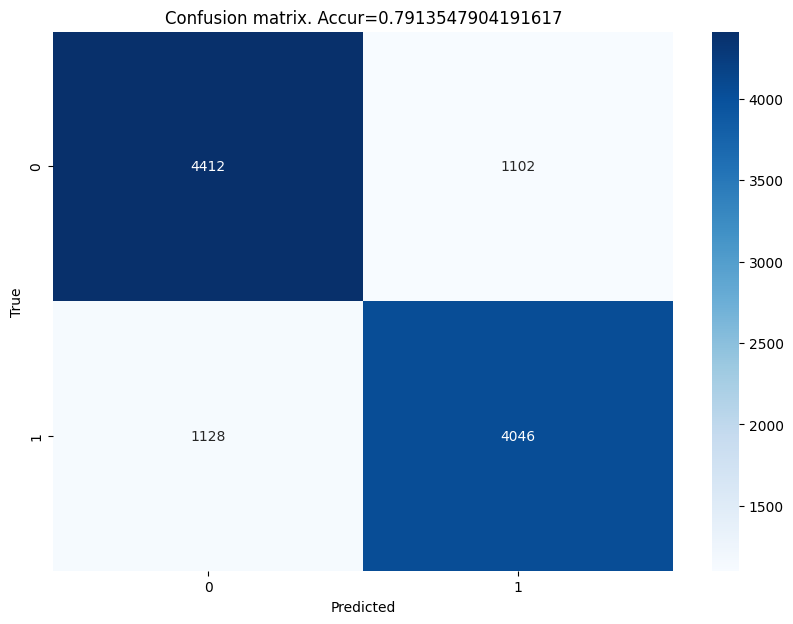

In [139]:
test_representations_we(X_train_w2v, y_train_s, X_test_w2v, y_test_s)

Third model with Logistic Regression classifier and Word Embeddings vectorizing results in an Accuracy of 79.1%

## Results

In [143]:
print('Results by vectorizing method:')
print('-----------------------------')
print('Accuracy - BoW: 82.6%')
print('Using a MultinomialNB classifier')
print('-----------------------------')
print('Accuracy - TFIDF: 83.3%')
print('Using a MultinomialNB classifier')
print('-----------------------------')
print('Accuracy - Word Embeddings: 79.1%')
print('Using a Logistic regression classifier')

Results by vectorizing method:
-----------------------------
Accuracy - BoW: 82.6%
Using a MultinomialNB classifier
-----------------------------
Accuracy - TFIDF: 83.3%
Using a MultinomialNB classifier
-----------------------------
Accuracy - Word Embeddings: 79.1%
Using a Logistic regression classifier
